[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1xjl1uHiSPMCxbofMjyRljVsNX9JTfaZ6#scrollTo=bSJ8TMsdrujn)

# **Image/Multiclass Classification - Convolutional Neural Network**

## **The Fashion MNIST dataset**

`Fashion-MNIST` is a dataset of images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend `Fashion-MNIST` to serve as a direct drop-in replacement for the original [MNIST dataset](http://yann.lecun.com/exdb/mnist/) for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

Here's an example of how the data looks (each class takes three-rows):

![Fashion MNIST](https://github.com/ravichandrakorivi/deep-learning-code/raw/main/images/fashion-mnist-sprite.png)

## **Labels**

Each training and test example is assigned to one of the following labels:

| Label | Description |
|:------:|:-------------|
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# initialize the seeds of different random number generators so that the
# results will be the same every time the notebook is run
keras.utils.set_random_seed(42)

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
labels = ["T-shirt/top",
          "Trouser",
          "Pullover",
          "Dress",
          "Coat",
          "Sandal",
          "Shirt",
          "Sneaker",
          "Bag",
          "Ankle boot"
]

In [4]:
def plot_loss_curves(history):
  plt.clf()
  history_dict = history.history
  loss_values = history_dict["loss"]
  val_loss_values = history_dict["val_loss"]
  epochs = range(1, len(loss_values) + 1)
  plt.plot(epochs, loss_values, "bo", label="Training loss")
  plt.plot(epochs, val_loss_values, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

In [5]:
def plot_acc_curves(history):
  plt.clf()
  history_dict = history.history
  acc = history_dict["accuracy"]
  val_acc = history_dict["val_accuracy"]
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, "bo", label="Training acc")
  plt.plot(epochs, val_acc, "b", label="Validation acc")
  plt.title("Training and validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

## **A Convolutional Neural Network**

### **Data Preparation**
As we did before, let's normalize to the 0-1 range by dividing everything by 255.

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

For reasons that will become clear later when we work with color images, we also need to add another dimension to each example so that it goes from 28x28 to 28x28x1

In [8]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [9]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

### **Define CNN Model**


In [10]:
# Input layer
input = keras.Input(shape=x_train.shape[1:])

################ The first conlutional block ################
# convolutional layer
x = keras.layers.Conv2D(
    32,                 # Number of filters
    kernel_size=(2,2),  # The shape of each filter
    activation="relu",
    name="Conv_1"
    )(input)

# pooling layer
x = keras.layers.MaxPool2D()(x)
############### End of first conlutional block ###############

################ The second conlutional block ################
# convolutional layer
x = keras.layers.Conv2D(
    32,
    kernel_size=(2,2),
    activation="relu",
    name="Conv_2"
    )(x)

# pooling layer
x = keras.layers.MaxPool2D()(x)
############### End of second conlutional block ###############

# flatten layer
x = keras.layers.Flatten()(x)

# flly-connected (dense) ReLU layer
x = keras.layers.Dense(256, activation="relu")(x)

# output softmax layer
output = keras.layers.Dense(10, activation="softmax")(x)

model = keras.Model(input, output)

In [11]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_1 (Conv2D)                 │ (None, 27, 27, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_2 (Conv2D)                 │ (None, 12, 12, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 302,026 (1.15 MB)

 Trainable params: 302,026 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

**No. of parameters in a Convolutional layer**:

Parameters in a convolutional layer = (K<sub>h</sub>​ × K<sub>w</sub> ​× C<sub>in</sub> ​× C<sub>out</sub>) + C<sub>out</sub>

Where,
K<sub>h</sub>​ , K<sub>w</sub>   =   kernel height & width <br>
C<sub>in</sub>                  =   input channels <br>
C<sub>out</sub>                 =   number of filters <br>
+C<sub>out</sub>               =   bias for each filter

**No. of parameters in a Pooling layer**:

Pooling layers have zero parameters.

In [12]:
(2*2*1*32) + 32

160

In [13]:
(2*2*32*32) + 32

4128

In [14]:
6* 6*32

1152

In [15]:
1152*256 + 256

295168

In [16]:
256*10 + 10

2570

In [17]:
160 + 4128 + 295168 + 2570

302026

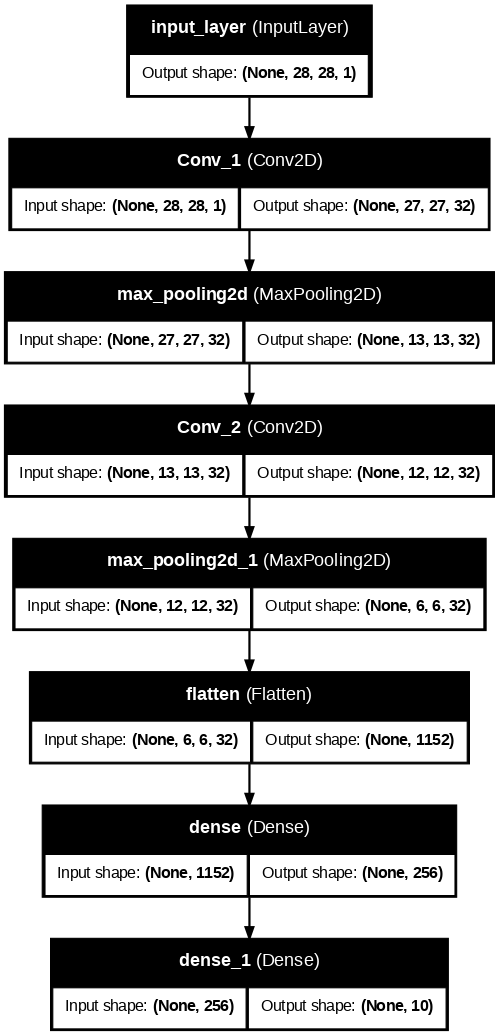

In [18]:
#keras.utils.plot_model(model, show_shapes=True)

from IPython.display import Image, display

keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    dpi=80
)
display(Image("model.png", height=750))

### **Set Optimization Parameters**

In [19]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
    )

### **Train the Model**

In [20]:
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=10,
    validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.7465 - loss: 0.7088 - val_accuracy: 0.8706 - val_loss: 0.3706
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 34s 45ms/step - accuracy: 0.8736 - loss: 0.3576 - val_accuracy: 0.8871 - val_loss: 0.3100
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.8927 - loss: 0.3005 - val_accuracy: 0.8964 - val_loss: 0.2808
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.9030 - loss: 0.2649 - val_accuracy: 0.9010 - val_loss: 0.2648
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 31s 41ms/step - accuracy: 0.9131 - loss: 0.2377 - val_accuracy: 0.9047 - val_loss: 0.2577
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 34s 45ms/step - accuracy: 0.9223 - loss: 0.2149 - val_accuracy: 0.9064 - val_loss: 0.2581
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 32s 42ms/step - accuracy: 0.9287 - loss: 0.1946 - val_accuracy: 0.9068 - val_loss: 0.2594
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 43ms/step - accuracy: 0.9355 - loss: 0.1764 - 

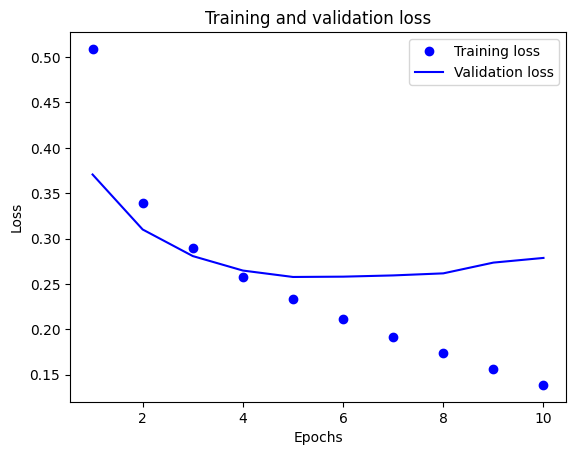

In [21]:
plot_loss_curves(history)

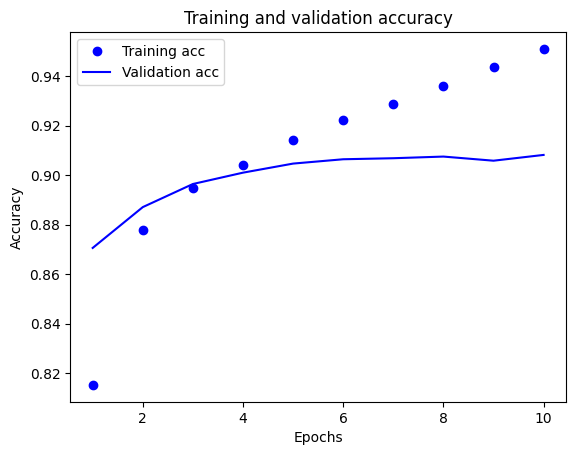

In [22]:
plot_acc_curves(history)

The validation loss/accuracy are flattening out but not increasing yet so we can just go forward with this model.

In [23]:
score = model.evaluate(x_test, y_test)
print("Test accuracy:", score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8975 - loss: 0.3039
Test accuracy: 0.8984000086784363


**Excellent! We got to over 90% accuracy on the test set - nice.**

> Using two **specialized layers - the convolutional and pooling layers -** helped us exceed 90%.

Using two specialized layers - the convolutional and pooling layers - helped us exceed 90%.

Back to Fashion MNIST. Let's see what the state of the art (SOTA) accuracy is.

It is 96.91%!

**Challenge: Can wet get to SOTA by playing around with the architecture of the network?** Add more convolutional layers, change the size of each convolutional filter etc.

## **Iteratively Improving the Model**

> **Practical Tip**: Once any model is built, it is a good idea to look at the predictions on the test set and see what types of examples the model has difficulty predicting. That can often suggest ways in which the model can be improved.

For problems where the input data consists of *images* (like Fashion MNIST), **visualization** can be very helpful.


In [24]:
# get the predictions
y_hat = np.argmax(model.predict(x_test), axis=1)

# collect examples where the model made a mistake
misses = np.where(y_hat != y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


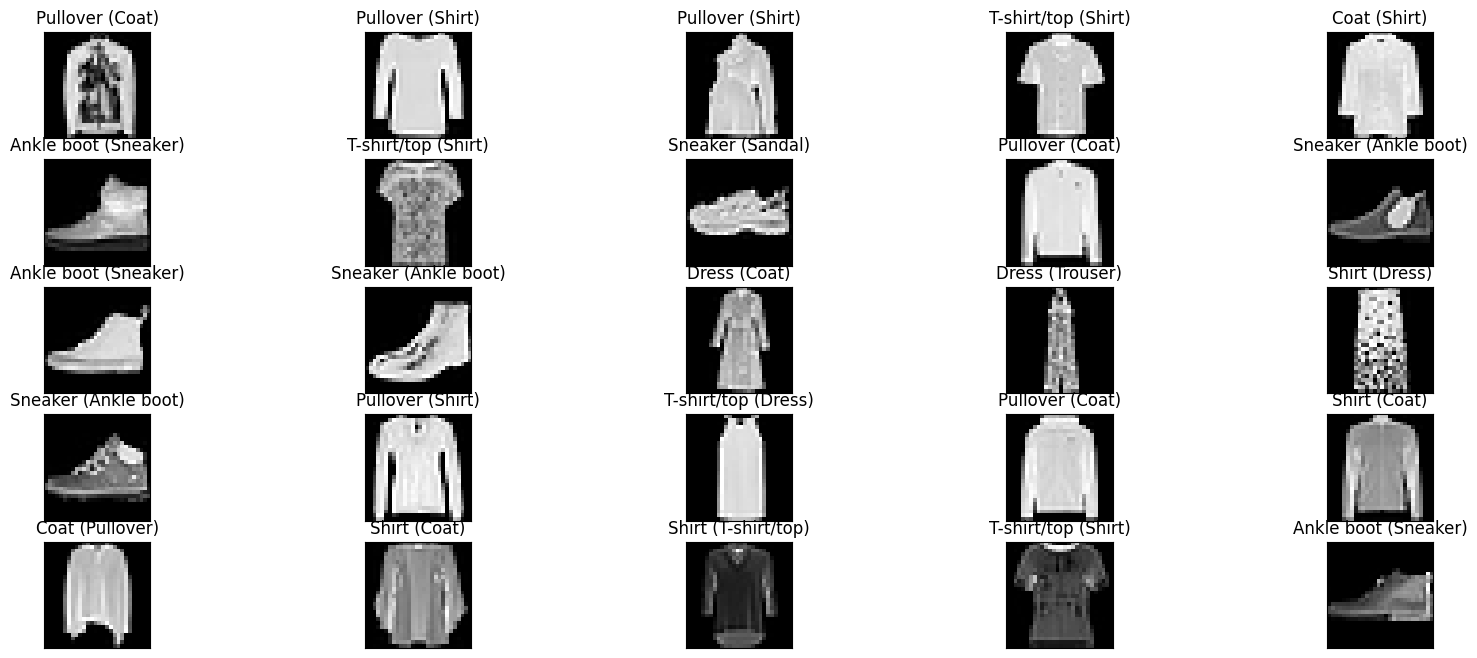

In [25]:
# Plot a random sample of 25 test images incorrectly classified by the model,
# their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(misses[0], size=25, replace=False)):
    ax = figure.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]), cmap="gray")
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[y_hat[index]],
                                  labels[y_test[index]]))

You can see that the model seems to be having difficulty distinguishing between *visually similar* categories.

The **confusion matrix** is a good way to get a complete picture of this phenomenon.

In [26]:
actuals = [labels[i] for i in y_test]
predictions = [labels[i] for i in y_hat]

In [27]:
df = pd.DataFrame({'Predictions': predictions, 'Actuals': actuals})
pd.crosstab(df.Predictions, df.Actuals)

Actuals,Ankle boot,Bag,Coat,Dress,Pullover,Sandal,Shirt,Sneaker,T-shirt/top,Trouser
Predictions,,,,,,,,,,
Ankle boot,946,0,0,0,0,2,0,19,1,0
Bag,0,973,0,0,0,0,4,0,5,0
Coat,0,3,769,19,30,0,54,0,1,3
Dress,0,6,33,920,7,0,21,0,23,20
Pullover,0,5,118,11,893,0,92,0,34,1
Sandal,11,3,0,0,1,987,0,18,1,0
Shirt,0,6,80,38,59,0,747,0,115,9
Sneaker,42,3,0,0,0,11,0,963,0,0
T-shirt/top,1,1,0,11,10,0,82,0,820,1


**Observations**

*   All the off-diagonal numbers represent mistakes made by the model.
*   You can see that the model made the most mistakes for "Shirts". It confused a "Shirt" for a "T-shirt/Top" often. This is understandable since the products are visually similar.

---
**How can we improve the model?**

> **Tip**: Get more data on those categories that the model has difficulty distinguishing between (e.g., Shirts and T-Shirts), enrich the original training dataset with these new examples and re-train the model.

## Conclusion

We have built a Deep Learning model that can classify grayscale images of clothing items with over 90% accuracy!!